In [1]:
!pip install pandas sklearn matplotlib

  Using cached https://files.pythonhosted.org/packages/73/9b/52e228545d14f14bb2a1622e225f38463c8726645165e1cb7dde95bfe6d4/pandas-0.25.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/57/4f/dd381ecf6c6ab9bcdaa8ea912e866dedc6e696756156d8ecc087e20817e2/matplotlib-3.1.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/a0/c5/d2238762d780dde84a20b8c761f563fe882b88c5a5fb03c056547c442a19/scikit_learn-0.21.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f8/a1/5742b56282449b1c0968197f63eae486eca2c35dcd334bab75ad524e0de1/kiwisolver-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/11/fa/0160cd525c62d7abd076a070ff02b2b94de589f1a9789774f17d7c54058e/pyparsing-2.4.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.

In [2]:
import os, copy
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from datetime import date
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='font_ch.ttf', size=14)

from sklearn.metrics import log_loss, roc_auc_score, auc, roc_curve, accuracy_score, brier_score_loss, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# 因為擬合(fit)與編碼(transform)需要分開, 因此不使用.get_dummy, 而採用 sklearn 的 OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df_train = pd.read_csv('./T-BrainAI_dataset/train.csv', encoding='big5')
Y1_mapping = {
    'Y': 1,
    'N': 0
}
df_train['Y1'] = df_train['Y1'].map(Y1_mapping)
train_Y = df_train[['Y1']]
train_Y # 0:1 = 98000:2000

train_X = df_train.drop(['CUS_ID','Y1'], axis=1)
train_X

,Y1
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


,GENDER,AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,EDUCATION_CD,MARRIAGE_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,L1YR_B_ISSUE_CNT,...,IF_ADD_INSD_IND,L1YR_GROSS_PRE_AMT,CUST_9_SEGMENTS_CD,FINANCETOOLS_A,FINANCETOOLS_B,FINANCETOOLS_C,FINANCETOOLS_D,FINANCETOOLS_E,FINANCETOOLS_F,FINANCETOOLS_G
0,M,低,A1,A1,NaN,NaN,Y,0,N,0,...,N,0.000174,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M,低,A1,A1,NaN,NaN,Y,0,N,0,...,N,0.008724,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M,低,A1,A1,1.0,0.0,Y,1,Y,0,...,N,0.005359,A,Y,N,N,N,N,N,N
3,M,低,A1,A1,NaN,0.0,Y,0,N,0,...,N,0.000000,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,M,低,A1,A1,1.0,0.0,N,0,N,0,...,N,0.000603,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,M,低,A1,A1,NaN,0.0,Y,0,N,0,...,N,0.000243,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,M,低,A1,A1,NaN,0.0,N,0,N,0,...,N,0.002600,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,M,低,A1,A1,NaN,0.0,Y,0,N,0,...,N,0.002887,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,M,低,A1,A1,1.0,0.0,N,0,N,0,...,N,0.000140,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,M,低,A1,A1,NaN,0.0,N,0,N,0,...,N,0.000182,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_test = pd.read_csv('./T-BrainAI_dataset/test.csv', encoding='big5')
test_X = df_test.drop('CUS_ID', axis=1)
test_X

,GENDER,AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,EDUCATION_CD,MARRIAGE_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,L1YR_B_ISSUE_CNT,...,IF_ADD_INSD_IND,L1YR_GROSS_PRE_AMT,CUST_9_SEGMENTS_CD,FINANCETOOLS_A,FINANCETOOLS_B,FINANCETOOLS_C,FINANCETOOLS_D,FINANCETOOLS_E,FINANCETOOLS_F,FINANCETOOLS_G
0,M,低,A1,A1,2.0,0.0,Y,4,Y,0,...,Y,0.000151,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M,低,A1,A1,NaN,0.0,N,0,N,0,...,N,0.000000,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M,低,A1,A1,1.0,0.0,N,0,N,0,...,N,0.000090,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,M,低,A1,A1,NaN,0.0,N,0,N,0,...,N,0.000000,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,M,低,A1,A1,1.0,0.0,Y,0,Y,0,...,N,0.000179,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,M,低,A1,A1,NaN,0.0,Y,0,N,0,...,N,0.001452,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,M,低,A1,A1,NaN,0.0,N,0,N,0,...,N,0.000314,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,M,低,A1,A1,NaN,0.0,N,0,N,0,...,N,0.000000,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,M,低,A1,A1,NaN,0.0,Y,0,N,0,...,N,0.006626,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,M,低,A1,A1,NaN,0.0,N,0,N,0,...,N,0.000000,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# train_X.isnull().sum().sort_values()[113:].index
test_X.isnull().sum().sort_values()[80:]
# df_train[df_train['Y1'] == 1].isnull().sum().sort_values()[80:]

IF_ISSUE_INSD_L_IND           29911
IF_ISSUE_INSD_M_IND           29911
IF_ISSUE_INSD_N_IND           29911
IF_ISSUE_INSD_O_IND           29911
IF_ISSUE_INSD_P_IND           29911
IF_ISSUE_INSD_Q_IND           29911
IF_ISSUE_INSD_C_IND           29911
IF_ISSUE_INSD_A_IND           29911
IF_ISSUE_INSD_B_IND           29911
EDUCATION_CD                  30295
INPATIENT_SURGERY_AMT         41465
DIEACCIDENT_AMT               41465
POLICY_VALUE_AMT              41465
ANNUITY_AMT                   41465
EXPIRATION_AMT                41465
ACCIDENT_HOSPITAL_REC_AMT     41465
DISEASES_HOSPITAL_REC_AMT     41465
OUTPATIENT_SURGERY_AMT        41465
MONTHLY_CARE_AMT              41465
LONG_TERM_CARE_AMT            41465
ILL_ADDITIONAL_AMT            41465
ILL_ACCELERATION_AMT          41465
FIRST_CANCER_AMT              41465
PAY_LIMIT_MED_MISC_AMT        41465
DIEBENEFIT_AMT                41465
ANNUAL_INCOME_AMT             57419
TERMINATION_RATE              64214
RFM_M_LEVEL                 

In [5]:
# 補缺值
nonNum_features = []
Num_features = []
for feature in train_X.columns:
    try:
        if train_X[feature].dtype == object:
            nonNum_features.append(feature)
    except TypeError as e:
        print('nonNum_features: ', e)

    try:
        if (train_X[feature].dtype == int) or (train_X[feature].dtype == float):
            Num_features.append(feature)
    except TypeError as e:
        print('Num_features: ', e)

print(f'{len(nonNum_features)} Non-num Features : {nonNum_features}\n')
print(f'{len(Num_features)} Num Features : {Num_features}\n')


# col_keep_null = ['IF_ADD_INSD_R_IND', 'IF_ADD_INSD_Q_IND', 'IF_ADD_INSD_L_IND',
#        'IF_ADD_INSD_G_IND', 'IF_ADD_INSD_F_IND', 'ANNUAL_PREMIUM_AMT',
#        'FINANCETOOLS_F', 'FINANCETOOLS_A', 'FINANCETOOLS_B', 'FINANCETOOLS_C',
#        'FINANCETOOLS_D', 'FINANCETOOLS_E', 'FINANCETOOLS_G', 'C_IND', 'B_IND',
#        'A_IND', 'L1YR_C_CNT' , 'APC_1ST_AGE', 'RFM_R', 'REBUY_TIMES_CNT']

# for i in col_keep_null:
#     try:
#         train_X[i] = train_X[i].fillna('None')
#     except:
#         print('train_X: ', i)
        
#     try:
#         test_X[i] = test_X[i].fillna('None')
#     except:
#         print('test_X: ', i)

        
fill_values = {
    'INSD_LAST_YEARDIF_CNT': 0.1724875816240972, 'EDUCATION_CD': 3.0, 'APC_1ST_YEARDIF': 0.2587685984593603, 
    'LEVEL': 5.0, 'TERMINATION_RATE': 12.090984696216369
}

for i,j in fill_values.items():
    try:
        if (len(train_X[i]) > 0):
            train_X[i] = train_X[i].fillna(value=fill_values[i])
    except:
        print('train_X: ', i)

    try:
        if (len(test_X[i]) > 0):
            test_X[i] = test_X[i].fillna(value=fill_values[i])
    except:
        print('test_X: ', i)
# 因為train和test資料分布不同，不能拿一樣的值來補，可能是這個原因test資料的AUC比valid相差很多

        
nonNum_values = {
    'AGE': '低', 'APC_1ST_AGE': '中高', 'A_IND': 'N', 'B_IND': 'N', 'CHARGE_CITY_CD': 'B1', 'CONTACT_CITY_CD': 'A1', 
    'CUST_9_SEGMENTS_CD': 'C', 'C_IND': 'N', 'FINANCETOOLS_A': 'Y', 'FINANCETOOLS_B': 'N', 'FINANCETOOLS_C': 'N', 
    'FINANCETOOLS_D': 'N', 'FINANCETOOLS_E': 'N', 'FINANCETOOLS_F': 'N', 'FINANCETOOLS_G': 'N', 'GENDER': 'F', 
    'IF_2ND_GEN_IND': 'Y', 'IF_ADD_F_IND': 'N', 'IF_ADD_G_IND': 'N', 'IF_ADD_IND': 'N', 'IF_ADD_INSD_F_IND': 'None', 
    'IF_ADD_INSD_G_IND': 'N', 'IF_ADD_INSD_IND': 'N', 'IF_ADD_INSD_L_IND': 'Y', 'IF_ADD_INSD_Q_IND': 'Y', 
    'IF_ADD_INSD_R_IND': 'N', 'IF_ADD_L_IND': 'N', 'IF_ADD_Q_IND': 'N', 'IF_ADD_R_IND': 'N', 'IF_HOUSEHOLD_CLAIM_IND': 'Y', 
    'IF_ISSUE_A_IND': 'N', 'IF_ISSUE_B_IND': 'N', 'IF_ISSUE_C_IND': 'N', 'IF_ISSUE_D_IND': 'N', 'IF_ISSUE_E_IND': 'N', 
    'IF_ISSUE_F_IND': 'N', 'IF_ISSUE_G_IND': 'N', 'IF_ISSUE_H_IND': 'N', 'IF_ISSUE_INSD_A_IND': 'N', 
    'IF_ISSUE_INSD_B_IND': 'N', 'IF_ISSUE_INSD_C_IND': 'N', 'IF_ISSUE_INSD_D_IND': 'N', 'IF_ISSUE_INSD_E_IND': 'N', 
    'IF_ISSUE_INSD_F_IND': 'N', 'IF_ISSUE_INSD_G_IND': 'N', 'IF_ISSUE_INSD_H_IND': 'N', 'IF_ISSUE_INSD_I_IND': 'N', 
    'IF_ISSUE_INSD_J_IND': 'N', 'IF_ISSUE_INSD_K_IND': 'N', 'IF_ISSUE_INSD_L_IND': 'N', 'IF_ISSUE_INSD_M_IND': 'N', 
    'IF_ISSUE_INSD_N_IND': 'N', 'IF_ISSUE_INSD_O_IND': 'N', 'IF_ISSUE_INSD_P_IND': 'N', 'IF_ISSUE_INSD_Q_IND': 'N', 
    'IF_ISSUE_I_IND': 'N', 'IF_ISSUE_J_IND': 'N', 'IF_ISSUE_K_IND': 'N', 'IF_ISSUE_L_IND': 'N', 'IF_ISSUE_M_IND': 'N', 
    'IF_ISSUE_N_IND': 'N', 'IF_ISSUE_O_IND': 'N', 'IF_ISSUE_P_IND': 'N', 'IF_ISSUE_Q_IND': 'N', 'IF_S_REAL_IND': 'N', 
    'IF_Y_REAL_IND': 'N', 'IM_IS_A_IND': 'N', 'IM_IS_B_IND': 'N', 'IM_IS_C_IND': 'N', 'IM_IS_D_IND': 'N', 
    'INSD_1ST_AGE': '中', 'L1YR_LAPSE_IND': 'N', 'L1YR_PAYMENT_REMINDER_IND': 'N', 'LAST_A_CCONTACT_DT': 'N', 
    'LAST_A_ISSUE_DT': 'N', 'LAST_B_CONTACT_DT': 'N', 'LAST_B_ISSUE_DT': 'N', 'LAST_C_DT': 'N', 'LIFE_CNT': '低', 
    'REBUY_TIMES_CNT': '低', 'RFM_R': '低', 'X_A_IND': 'N', 'X_B_IND': 'N', 'X_C_IND': 'N', 'X_D_IND': 'N', 'X_E_IND': 'N', 
    'X_F_IND': 'N', 'X_G_IND': 'N', 'X_H_IND': 'N'
}

for i,j in nonNum_values.items():
    try:
        if train_X[i][0]:
            train_X[i] = train_X[i].fillna(value=nonNum_values[i])
    except KeyError as e:
        print('train_X: ', e)

    try:
        if test_X[i][0]:
            test_X[i] = test_X[i].fillna(value=nonNum_values[i])
    except KeyError as e:
        print('test_X: ', e)


# 塞平均數的表現沒有太多影響
# for i in Num_features:
#     try:
#         if train_X[i][0]:
#             train_X[i] = train_X[i].fillna(np.mean(train_X[i]))
#     except KeyError as e:
#         print('train_X: ', e)

#     try:
#         if test_X[i][0]:
#             test_X[i] = test_X[i].fillna(np.mean(test_X[i]))
#     except KeyError as e:
#         print('test_X: ', e)
        

# Y1_1 vs Y1_0  # 不篩反而比較好 # 從篩改成加乘
# variance_col = ['AGE', 'CHARGE_CITY_CD', 'LAST_A_CCONTACT_DT', 'LAST_A_ISSUE_DT', 'APC_1ST_AGE', 'INSD_1ST_AGE', 
#                 'IF_2ND_GEN_IND', 'RFM_R', 'REBUY_TIMES_CNT', 'LIFE_CNT', 'IF_ISSUE_N_IND', 'IF_ISSUE_P_IND', 
#                 'IF_ISSUE_Q_IND', 'IF_ADD_L_IND', 'IF_ADD_Q_IND', 'IF_ADD_R_IND', 'IF_ADD_IND', 'LAST_C_DT', 'IF_S_REAL_IND',
#                 'IM_IS_B_IND', 'IM_IS_D_IND', 'X_A_IND', 'X_B_IND', 'X_C_IND', 'X_E_IND', 'X_H_IND', 'IF_ISSUE_INSD_I_IND', 
#                 'IF_ISSUE_INSD_J_IND', 'IF_ISSUE_INSD_P_IND', 'IF_ISSUE_INSD_Q_IND', 'IF_ADD_INSD_R_IND', 'IF_ADD_INSD_Q_IND', 
#                 'IF_ADD_INSD_L_IND', 'CUST_9_SEGMENTS_CD']

# train_X = train_X[variance_col]
# test_X = test_X[variance_col]

# exclude RF feature importance lower columns
exc = ['DIEBENEFIT_AMT', 'X_E_IND', 'IF_ISSUE_INSD_I_IND', 'RFM_M_LEVEL',
       'ACCIDENT_HOSPITAL_REC_AMT', 'OUTPATIENT_SURGERY_AMT',
       'PAY_LIMIT_MED_MISC_AMT', 'IF_ADD_L_IND',
       'DISEASES_HOSPITAL_REC_AMT', 'INPATIENT_SURGERY_AMT', 'C_IND',
       'RFM_R', 'BANK_NUMBER_CNT', 'ANNUAL_INCOME_AMT', 'IM_CNT',
       'FINANCETOOLS_A', 'MONTHLY_CARE_AMT', 'CHARGE_CITY_CD',
       'FINANCETOOLS_F', 'IF_ADD_INSD_L_IND', 'POLICY_VALUE_AMT',
       'FINANCETOOLS_G', 'FINANCETOOLS_E', 'FIRST_CANCER_AMT',
       'FINANCETOOLS_B', 'APC_1ST_AGE', 'MARRIAGE_CD',
       'LONG_TERM_CARE_AMT', 'FINANCETOOLS_D', 'A_IND', 'ANNUITY_AMT',
       'ILL_ACCELERATION_AMT', 'IF_2ND_GEN_IND', 'FINANCETOOLS_C',
       'CONTACT_CITY_CD', 'TERMINATION_RATE', 'ILL_ADDITIONAL_AMT',
       'IF_ISSUE_J_IND', 'IF_S_REAL_IND', 'B_IND', 'AG_CNT', 'LAST_C_DT',
       'IM_IS_D_IND', 'IF_ADD_INSD_R_IND', 'IF_ISSUE_INSD_P_IND',
       'IF_ADD_INSD_Q_IND', 'APC_CNT', 'IF_ADD_INSD_F_IND',
       'IF_ADD_F_IND', 'EXPIRATION_AMT', 'L1YR_LAPSE_IND',
       'IF_ISSUE_INSD_Q_IND', 'X_D_IND', 'IF_HOUSEHOLD_CLAIM_IND',
       'GENDER', 'IF_ISSUE_INSD_J_IND', 'IF_ADD_R_IND', 'X_C_IND',
       'IF_ISSUE_D_IND', 'IF_ADD_INSD_IND', 'IM_IS_C_IND', 'IM_IS_B_IND',
       'IF_ISSUE_INSD_N_IND', 'IF_ISSUE_INSD_D_IND', 'IF_ISSUE_A_IND',
       'IF_ADD_INSD_G_IND', 'LAST_B_CONTACT_DT', 'IF_Y_REAL_IND',
       'IF_ISSUE_P_IND', 'IF_ISSUE_N_IND', 'IF_ISSUE_INSD_G_IND',
       'IF_ISSUE_INSD_C_IND', 'IF_ISSUE_INSD_A_IND', 'IF_ISSUE_G_IND',
       'IF_ISSUE_C_IND', 'L1YR_PAYMENT_REMINDER_IND', 'IM_IS_A_IND',
       'IF_ISSUE_INSD_F_IND', 'IF_ISSUE_INSD_B_IND', 'IF_ADD_G_IND',
       'LAST_B_ISSUE_DT', 'IF_ISSUE_INSD_E_IND', 'X_G_IND', 'X_F_IND',
       'X_A_IND', 'L1YR_B_ISSUE_CNT', 'IF_ISSUE_O_IND', 'IF_ISSUE_M_IND',
       'IF_ISSUE_L_IND', 'IF_ISSUE_K_IND', 'IF_ISSUE_INSD_O_IND',
       'IF_ISSUE_INSD_M_IND', 'IF_ISSUE_INSD_L_IND',
       'IF_ISSUE_INSD_K_IND', 'IF_ISSUE_INSD_H_IND', 'IF_ISSUE_H_IND',
       'IF_ISSUE_F_IND', 'IF_ISSUE_E_IND', 'IF_ISSUE_B_IND',
       'CHANNEL_B_POL_CNT']

excc0003 = ['IF_ADD_L_IND', 'FINANCETOOLS_G', 'FINANCETOOLS_A', 'MARRIAGE_CD',
       'PAY_LIMIT_MED_MISC_AMT', 'IF_ADD_INSD_L_IND', 'A_IND',
       'POLICY_VALUE_AMT', 'IF_ADD_INSD_F_IND', 'FINANCETOOLS_E',
       'IF_S_REAL_IND', 'FINANCETOOLS_D', 'TERMINATION_RATE',
       'IF_ADD_INSD_Q_IND', 'ILL_ACCELERATION_AMT', 'IF_2ND_GEN_IND',
       'IM_IS_B_IND', 'FINANCETOOLS_C', 'APC_CNT', 'X_E_IND',
       'IF_ADD_INSD_IND', 'LAST_B_CONTACT_DT', 'IF_ISSUE_INSD_P_IND',
       'X_C_IND', 'LONG_TERM_CARE_AMT', 'IF_ADD_R_IND',
       'IF_ADD_INSD_R_IND', 'L1YR_LAPSE_IND', 'IF_ISSUE_INSD_Q_IND',
       'IM_IS_D_IND', 'IF_ISSUE_P_IND', 'IF_HOUSEHOLD_CLAIM_IND',
       'IF_ADD_INSD_G_IND', 'IF_Y_REAL_IND', 'EXPIRATION_AMT',
       'IF_ISSUE_INSD_N_IND', 'IF_ISSUE_INSD_D_IND', 'BANK_NUMBER_CNT',
       'IF_ISSUE_INSD_J_IND', 'IF_ISSUE_N_IND', 'IF_ADD_F_IND', 'X_D_IND',
       'ILL_ADDITIONAL_AMT', 'LAST_C_DT', 'IM_IS_C_IND',
       'IF_ISSUE_INSD_G_IND', 'IF_ISSUE_INSD_B_IND', 'IF_ISSUE_D_IND',
       'IF_ISSUE_INSD_C_IND', 'IF_ISSUE_INSD_A_IND',
       'L1YR_PAYMENT_REMINDER_IND', 'IF_ISSUE_INSD_F_IND',
       'IF_ISSUE_C_IND', 'IF_ISSUE_A_IND', 'X_G_IND', 'X_F_IND',
       'X_A_IND', 'LAST_B_ISSUE_DT', 'L1YR_B_ISSUE_CNT', 'IM_IS_A_IND',
       'IF_ISSUE_O_IND', 'IF_ISSUE_M_IND', 'IF_ISSUE_L_IND',
       'IF_ISSUE_K_IND', 'IF_ISSUE_INSD_O_IND', 'IF_ISSUE_INSD_M_IND',
       'IF_ISSUE_INSD_L_IND', 'IF_ISSUE_INSD_K_IND',
       'IF_ISSUE_INSD_H_IND', 'IF_ISSUE_INSD_E_IND', 'IF_ISSUE_H_IND',
       'IF_ISSUE_G_IND', 'IF_ISSUE_F_IND', 'IF_ISSUE_E_IND',
       'IF_ISSUE_B_IND', 'IF_ADD_G_IND', 'CHANNEL_B_POL_CNT']

train_X = train_X[train_X.columns.difference(excc0003)]
test_X = test_X[test_X.columns.difference(excc0003)]

train_X.isnull().sum().sort_values()
test_X.isnull().sum().sort_values()

89 Non-num Features : ['GENDER', 'AGE', 'CHARGE_CITY_CD', 'CONTACT_CITY_CD', 'LAST_A_CCONTACT_DT', 'LAST_A_ISSUE_DT', 'LAST_B_ISSUE_DT', 'APC_1ST_AGE', 'INSD_1ST_AGE', 'IF_2ND_GEN_IND', 'RFM_R', 'REBUY_TIMES_CNT', 'LIFE_CNT', 'IF_ISSUE_A_IND', 'IF_ISSUE_B_IND', 'IF_ISSUE_C_IND', 'IF_ISSUE_D_IND', 'IF_ISSUE_E_IND', 'IF_ISSUE_F_IND', 'IF_ISSUE_G_IND', 'IF_ISSUE_H_IND', 'IF_ISSUE_I_IND', 'IF_ISSUE_J_IND', 'IF_ISSUE_K_IND', 'IF_ISSUE_L_IND', 'IF_ISSUE_M_IND', 'IF_ISSUE_N_IND', 'IF_ISSUE_O_IND', 'IF_ISSUE_P_IND', 'IF_ISSUE_Q_IND', 'IF_ADD_F_IND', 'IF_ADD_L_IND', 'IF_ADD_Q_IND', 'IF_ADD_G_IND', 'IF_ADD_R_IND', 'IF_ADD_IND', 'L1YR_PAYMENT_REMINDER_IND', 'L1YR_LAPSE_IND', 'LAST_B_CONTACT_DT', 'A_IND', 'B_IND', 'C_IND', 'LAST_C_DT', 'IF_S_REAL_IND', 'IF_Y_REAL_IND', 'IM_IS_A_IND', 'IM_IS_B_IND', 'IM_IS_C_IND', 'IM_IS_D_IND', 'X_A_IND', 'X_B_IND', 'X_C_IND', 'X_D_IND', 'X_E_IND', 'X_F_IND', 'X_G_IND', 'X_H_IND', 'IF_HOUSEHOLD_CLAIM_IND', 'IF_ISSUE_INSD_A_IND', 'IF_ISSUE_INSD_B_IND', 'IF_ISSUE_IN

IF_ADD_Q_IND                     0
X_B_IND                          0
IF_ISSUE_INSD_I_IND              0
IF_ISSUE_I_IND                   0
IF_ISSUE_J_IND                   0
IF_ISSUE_Q_IND                   0
IM_CNT                           0
INSD_1ST_AGE                     0
INSD_CNT                         0
INSD_LAST_YEARDIF_CNT            0
L1YR_A_ISSUE_CNT                 0
L1YR_GROSS_PRE_AMT               0
LAST_A_CCONTACT_DT               0
LAST_A_ISSUE_DT                  0
LEVEL                            0
LIFE_CNT                         0
LIFE_INSD_CNT                    0
REBUY_TIMES_CNT                  0
RFM_R                            0
TOOL_VISIT_1YEAR_CNT             0
IF_ADD_IND                       0
GENDER                           0
X_H_IND                          0
CONTACT_CITY_CD                  0
FINANCETOOLS_F                   0
B_IND                            0
CHANNEL_A_POL_CNT                0
CHARGE_CITY_CD                   0
CLC_CUR_NUM         

IF_ADD_Q_IND                      0
X_B_IND                           0
IF_ISSUE_INSD_I_IND               0
IF_ISSUE_I_IND                    0
IF_ISSUE_J_IND                    0
IF_ISSUE_Q_IND                    0
IM_CNT                            0
INSD_1ST_AGE                      0
INSD_CNT                          0
INSD_LAST_YEARDIF_CNT             0
L1YR_A_ISSUE_CNT                  0
L1YR_GROSS_PRE_AMT                0
LAST_A_CCONTACT_DT                0
LAST_A_ISSUE_DT                   0
LEVEL                             0
LIFE_CNT                          0
LIFE_INSD_CNT                     0
REBUY_TIMES_CNT                   0
RFM_R                             0
TOOL_VISIT_1YEAR_CNT              0
IF_ADD_IND                        0
GENDER                            0
X_H_IND                           0
CONTACT_CITY_CD                   0
FINANCETOOLS_F                    0
B_IND                             0
CHANNEL_A_POL_CNT                 0
CHARGE_CITY_CD              

In [6]:
# LEncoder = LabelEncoder()
# MMEncoder = MinMaxScaler()
for c in train_X.columns:
#     train_X[c] = train_X[c].fillna(-1)
    if train_X[c].dtype == 'object':
        train_X[c] = train_X[c].fillna(train_X[c].mode().values[0])
#         train_X[c] = LEncoder.fit_transform(list(train_X[c].values))

#     if (train_X[c].dtype == int) or (train_X[c].dtype == float):
#         train_X[c] = train_X[c].fillna(-1)
#     train_X[c] = MMEncoder.fit_transform(train_X[c].values.reshape(-1, 1))

# train_X[c] = train_X[c].fillna('None')
t = pd.get_dummies(train_X)
train_X = pd.DataFrame(t)
train_X = train_X.fillna(-1)
train_X.head()


for c in test_X.columns:
#     test_X[c] = test_X[c].fillna(-1)
    if test_X[c].dtype == 'object':
        test_X[c] = test_X[c].fillna(test_X[c].mode().values[0])
#         test_X[c] = LEncoder.fit_transform(list(test_X[c].values))
#     if (test_X[c].dtype == int) or (test_X[c].dtype == float):
#         test_X[c] = test_X[c].fillna(-1)
#         test_X[c] = MMEncoder.fit_transform(test_X[c].values.reshape(-1, 1))
#     test_X[c] = MMEncoder.fit_transform(test_X[c].values.reshape(-1, 1))

# test_X[c] = test_X[c].fillna('None')
t = pd.get_dummies(test_X)
test_X = pd.DataFrame(t)
test_X = test_X.fillna(-1)
test_X.head()

,ACCIDENT_HOSPITAL_REC_AMT,AG_CNT,AG_NOW_CNT,ANNUAL_INCOME_AMT,ANNUAL_PREMIUM_AMT,ANNUITY_AMT,APC_1ST_YEARDIF,BMI,CHANNEL_A_POL_CNT,CLC_CUR_NUM,...,REBUY_TIMES_CNT_低,REBUY_TIMES_CNT_高,RFM_R_中,RFM_R_中高,RFM_R_低,RFM_R_高,X_B_IND_N,X_B_IND_Y,X_H_IND_N,X_H_IND_Y
0,-1.0,1,0,0.001667,0.000192,-1.0,0.046512,0.125,0,0,...,1,0,0,0,1,0,1,0,1,0
1,-1.0,1,0,0.000167,0.009675,-1.0,0.046512,0.175,0,0,...,1,0,0,0,1,0,1,0,1,0
2,0.0,1,0,0.000125,0.000292,0.0,0.000000,0.225,1,1,...,1,0,0,0,1,0,1,0,1,0
3,-1.0,1,0,0.004167,-1.000000,-1.0,0.162791,0.150,0,0,...,1,0,0,1,0,0,1,0,1,0
4,0.0,1,1,0.000083,0.000664,0.0,0.116279,0.175,1,1,...,1,0,1,0,0,0,0,1,1,0


,ACCIDENT_HOSPITAL_REC_AMT,AG_CNT,AG_NOW_CNT,ANNUAL_INCOME_AMT,ANNUAL_PREMIUM_AMT,ANNUITY_AMT,APC_1ST_YEARDIF,BMI,CHANNEL_A_POL_CNT,CLC_CUR_NUM,...,REBUY_TIMES_CNT_低,REBUY_TIMES_CNT_高,RFM_R_中,RFM_R_中高,RFM_R_低,RFM_R_高,X_B_IND_N,X_B_IND_Y,X_H_IND_N,X_H_IND_Y
0,-1.0,1,1,-1.000000,0.000259,-1.000000,0.000000,0.325,4,1,...,1,0,0,0,1,0,1,0,1,0
1,-1.0,1,0,-1.000000,-1.000000,-1.000000,0.181818,0.075,0,0,...,1,0,0,1,0,0,1,0,1,0
2,0.0,2,2,0.000083,0.000154,0.000000,0.068182,0.150,1,1,...,1,0,1,0,0,0,1,0,1,0
3,-1.0,1,0,-1.000000,-1.000000,-1.000000,0.159091,0.200,0,0,...,1,0,0,1,0,0,1,0,1,0
4,0.0,1,1,0.000083,0.000310,0.000498,0.045455,0.125,1,1,...,1,0,0,0,1,0,1,0,1,0


In [7]:
# Y1_1 vs Y1_0 # 從篩改成加乘
variance_col = ['AGE', 'CHARGE_CITY_CD', 'LAST_A_CCONTACT_DT', 'LAST_A_ISSUE_DT', 'APC_1ST_AGE', 'INSD_1ST_AGE', 
                'IF_2ND_GEN_IND', 'RFM_R', 'REBUY_TIMES_CNT', 'LIFE_CNT', 'IF_ISSUE_N_IND', 'IF_ISSUE_P_IND', 
                'IF_ISSUE_Q_IND', 'IF_ADD_L_IND', 'IF_ADD_Q_IND', 'IF_ADD_R_IND', 'IF_ADD_IND', 'LAST_C_DT', 'IF_S_REAL_IND',
                'IM_IS_B_IND', 'IM_IS_D_IND', 'X_A_IND', 'X_B_IND', 'X_C_IND', 'X_E_IND', 'X_H_IND', 'IF_ISSUE_INSD_I_IND', 
                'IF_ISSUE_INSD_J_IND', 'IF_ISSUE_INSD_P_IND', 'IF_ISSUE_INSD_Q_IND', 'IF_ADD_INSD_R_IND', 'IF_ADD_INSD_Q_IND', 
                'IF_ADD_INSD_L_IND', 'CUST_9_SEGMENTS_CD']

positive = ['AGE_中', 'CHARGE_CITY_CD_A1', 'CHARGE_CITY_CD_B1', 'LAST_A_CCONTACT_DT_Y','APC_1ST_AGE_低', 'APC_1ST_AGE_中高',
            'RFM_R_低','REBUY_TIMES_CNT_低','REBUY_TIMES_CNT_高','LIFE_CNT_高','IF_ISSUE_Q_IND_Y','IF_ADD_L_IND_Y',
            'IF_ADD_Q_IND_Y','IF_ADD_IND_Y','X_B_IND_Y','X_C_IND_Y','X_E_IND_Y','X_H_IND_Y','IF_ADD_INSD_L_IND_Y',
            'IF_ADD_INSD_Q_IND_Y','IF_ADD_INSD_R_IND_Y','CUST_9_SEGMENTS_CD_F','CUST_9_SEGMENTS_CD_G']
negative = ['AGE_低', 'AGE_高','LAST_A_CCONTACT_DT_N','INSD_1ST_AGE_低', 'INSD_1ST_AGE_高','RFM_R_None','REBUY_TIMES_CNT_None',
         'LIFE_CNT_低','X_B_IND_N','X_C_IND_N','X_H_IND_N','IF_ADD_INSD_L_IND_None','IF_ADD_INSD_Q_IND_None',
         'CUST_9_SEGMENTS_CD_C','CUST_9_SEGMENTS_CD_H']


for c in positive:
    if c in train_X.columns:
        train_X[c] = train_X[c] * 99999
    if c in test_X.columns:
        test_X[c] = test_X[c] * 99999
    
for c in negative:
    if c in train_X.columns:
        train_X[c] = train_X[c] * 0.0000001
    if c in test_X.columns:
        test_X[c] = test_X[c] * 0.0000001

train_X.head()
test_X.head()

,ACCIDENT_HOSPITAL_REC_AMT,AG_CNT,AG_NOW_CNT,ANNUAL_INCOME_AMT,ANNUAL_PREMIUM_AMT,ANNUITY_AMT,APC_1ST_YEARDIF,BMI,CHANNEL_A_POL_CNT,CLC_CUR_NUM,...,REBUY_TIMES_CNT_低,REBUY_TIMES_CNT_高,RFM_R_中,RFM_R_中高,RFM_R_低,RFM_R_高,X_B_IND_N,X_B_IND_Y,X_H_IND_N,X_H_IND_Y
0,-1.0,1,0,0.001667,0.000192,-1.0,0.046512,0.125,0,0,...,99999,0,0,0,99999,0,1.000000e-07,0,1.000000e-07,0
1,-1.0,1,0,0.000167,0.009675,-1.0,0.046512,0.175,0,0,...,99999,0,0,0,99999,0,1.000000e-07,0,1.000000e-07,0
2,0.0,1,0,0.000125,0.000292,0.0,0.000000,0.225,1,1,...,99999,0,0,0,99999,0,1.000000e-07,0,1.000000e-07,0
3,-1.0,1,0,0.004167,-1.000000,-1.0,0.162791,0.150,0,0,...,99999,0,0,1,0,0,1.000000e-07,0,1.000000e-07,0
4,0.0,1,1,0.000083,0.000664,0.0,0.116279,0.175,1,1,...,99999,0,1,0,0,0,0.000000e+00,99999,1.000000e-07,0


,ACCIDENT_HOSPITAL_REC_AMT,AG_CNT,AG_NOW_CNT,ANNUAL_INCOME_AMT,ANNUAL_PREMIUM_AMT,ANNUITY_AMT,APC_1ST_YEARDIF,BMI,CHANNEL_A_POL_CNT,CLC_CUR_NUM,...,REBUY_TIMES_CNT_低,REBUY_TIMES_CNT_高,RFM_R_中,RFM_R_中高,RFM_R_低,RFM_R_高,X_B_IND_N,X_B_IND_Y,X_H_IND_N,X_H_IND_Y
0,-1.0,1,1,-1.000000,0.000259,-1.000000,0.000000,0.325,4,1,...,99999,0,0,0,99999,0,1.000000e-07,0,1.000000e-07,0
1,-1.0,1,0,-1.000000,-1.000000,-1.000000,0.181818,0.075,0,0,...,99999,0,0,1,0,0,1.000000e-07,0,1.000000e-07,0
2,0.0,2,2,0.000083,0.000154,0.000000,0.068182,0.150,1,1,...,99999,0,1,0,0,0,1.000000e-07,0,1.000000e-07,0
3,-1.0,1,0,-1.000000,-1.000000,-1.000000,0.159091,0.200,0,0,...,99999,0,0,1,0,0,1.000000e-07,0,1.000000e-07,0
4,0.0,1,1,0.000083,0.000310,0.000498,0.045455,0.125,1,1,...,99999,0,0,0,99999,0,1.000000e-07,0,1.000000e-07,0


In [8]:
train_X_values = train_X.values
train_x, val_x, train_y, val_y = train_test_split(train_X_values, train_Y, test_size=0.25, random_state=0)
train_x

test_x = test_X.values
test_x

array([[ 0.0000e+00,  1.0000e+00,  1.0000e+00, ...,  0.0000e+00,
         1.0000e-07,  0.0000e+00],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
         1.0000e-07,  0.0000e+00],
       [-1.0000e+00,  1.0000e+00,  0.0000e+00, ...,  0.0000e+00,
         1.0000e-07,  0.0000e+00],
       ...,
       [ 8.0000e-02,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
         1.0000e-07,  0.0000e+00],
       [ 2.4000e-01,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
         1.0000e-07,  0.0000e+00],
       [ 0.0000e+00,  3.0000e+00,  1.0000e+00, ...,  9.9999e+04,
         0.0000e+00,  9.9999e+04]])

array([[-1.0000e+00,  1.0000e+00,  1.0000e+00, ...,  0.0000e+00,
         1.0000e-07,  0.0000e+00],
       [-1.0000e+00,  1.0000e+00,  0.0000e+00, ...,  0.0000e+00,
         1.0000e-07,  0.0000e+00],
       [ 0.0000e+00,  2.0000e+00,  2.0000e+00, ...,  0.0000e+00,
         1.0000e-07,  0.0000e+00],
       ...,
       [-1.0000e+00,  1.0000e+00,  1.0000e+00, ...,  9.9999e+04,
         0.0000e+00,  9.9999e+04],
       [-1.0000e+00,  1.0000e+00,  0.0000e+00, ...,  0.0000e+00,
         1.0000e-07,  0.0000e+00],
       [-1.0000e+00,  1.0000e+00,  1.0000e+00, ...,  0.0000e+00,
         1.0000e-07,  0.0000e+00]])

In [9]:
class_weight = {0: 1., 1: 13.}

# gdbt = GradientBoostingClassifier(subsample=0.93, n_estimators=320, min_samples_split=0.1, min_samples_leaf=0.3, 
#                                   max_features=6, max_depth=4, learning_rate=0.2)
rf = RandomForestClassifier(n_estimators=20, min_samples_split=10, min_samples_leaf=5, 
                            max_features=4, max_depth=3, bootstrap=True, class_weight=class_weight)
onehot = OneHotEncoder()
lr = LogisticRegression(solver='lbfgs', max_iter=1000)

rf.fit(train_x, train_y)
onehot.fit(rf.apply(train_x))
lr.fit(onehot.transform(rf.apply(train_x)), train_y)

RandomForestClassifier(bootstrap=True, class_weight={0: 1.0, 1: 13.0},
                       criterion='gini', max_depth=3, max_features=4,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=20, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# RandomizedSearchCV - https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652

rf_cv_score = cross_val_score(rf, train_x, train_y, cv=5, scoring='roc_auc')
print(rf_cv_score)
print(rf_cv_score.mean())

from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=60, num=10)]

min_samples_split = [int(x) for x in np.linspace(start=2, stop=20, num=10)]
min_samples_leaf = [int(x) for x in np.linspace(start=2, stop=2000, num=10)]

# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(3, 12, num=10)]
max_depth.append(None)

class_weight = [
    {0: 1., 1: 49.},
    {0: 1., 1: 40.},
    {0: 1., 1: 30.},
    {0: 1., 1: 20.},
    {0: 1., 1: 10.},
    {0: 1., 1: 1.}
]

# create random grid
random_grid = {
    'n_estimators': n_estimators,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features,
    'max_depth': max_depth,
    'class_weight': class_weight
 }

# Random search of parameters
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the model
rf_random.fit(train_x, train_y)
# print results
print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight={0: 1.0,
                                                                  1: 49.0},
                                                    criterion='gini',
                                                    max_depth=3, max_features=4,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=5,
                                                    min_samples_split=10,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=20,
                                               

{'n_estimators': 54, 'min_samples_split': 12, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'max_depth': 8, 'class_weight': {0: 1.0, 1: 1.0}}


In [10]:
# use RandomizedSearchCV best result 
# rfc = RandomForestClassifier(n_estimators=54, min_samples_split=12, min_samples_leaf=20, max_depth=6, max_features='sqrt', class_weight={0: 1.0, 1:13.0})
rfc = RandomForestClassifier(n_estimators=54, min_samples_split=12, min_samples_leaf=160, max_depth=8, max_features='sqrt', class_weight={0: 1.0, 1:13.0})
rfc.fit(train_x, train_y)
rfc_predict = rfc.predict(val_x)
rfc_cv_score = cross_val_score(rfc, train_X_values, train_Y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(val_y, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(val_y, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

RandomForestClassifier(bootstrap=True, class_weight={0: 1.0, 1: 13.0},
                       criterion='gini', max_depth=8, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=160,
                       min_samples_split=12, min_weight_fraction_leaf=0.0,
                       n_estimators=54, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

=== Confusion Matrix ===
[[23958   543]
 [  412    87]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     24501
           1       0.14      0.17      0.15       499

    accuracy                           0.96     25000
   macro avg       0.56      0.58      0.57     25000
weighted avg       0.97      0.96      0.96     25000



=== All AUC Scores ===
[0.70535765 0.69660408 0.94887806 0.97704617 0.8723301  0.75056658
 0.81197551 0.78305791 0.78084082 0.80697704]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8133633928571429


In [109]:
# output result
# test_Y_pred = rfc.predict_proba(test_X)
# df_test['predict_proba'] = test_Y_pred[:, 1]
# print(df_test.shape)
# df_test

# output = pd.concat((df_test[['CUS_ID']], df_test['predict_proba']), axis=1)
# output['predict_proba'] = output['predict_proba'].map(lambda x:1 if x>0.5 else 0)
# print(output.shape)
output.groupby('predict_proba').agg('count')

# out = output.groupby('CUS_ID', as_index=False).mean()
# out = out[['CUS_ID', 'predict_proba']]
# out.columns = ['CUS_ID', 'Ypred']
# out.to_csv('output_190927_15_RFC_RandomizedSearchCV.csv')
# out

,CUS_ID
predict_proba,
0,146261
1,3739


In [15]:
# feature importance - http://blog.datadive.net/selecting-good-features-part-iii-random-forests/
print("Features sorted by their score:")
df_f_imp = pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), train_X.columns), reverse=True), columns=['score', 'name'])
df_f_imp
exc = df_f_imp.query('score < [0.01]').name.values
exc

Features sorted by their score:


,score,name
0,0.0756,OCCUPATION_CLASS_CD
1,0.0661,LEVEL
2,0.0658,LAST_A_ISSUE_DT_Y
3,0.0627,ANNUAL_PREMIUM_AMT
4,0.0583,LAST_A_ISSUE_DT_N
5,0.0559,X_H_IND_Y
6,0.0506,LAST_A_CCONTACT_DT_Y
7,0.0387,INSD_LAST_YEARDIF_CNT
8,0.0384,CHANNEL_A_POL_CNT
9,0.0367,TOOL_VISIT_1YEAR_CNT


ValueError: Lengths must match to compare

In [ ]:
# GridSearchCV - https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/
param_grid = {
                 'n_estimators': [5, 10, 15, 20],
                 'max_depth': [2, 5, 7, 9]
             }

from sklearn.model_selection import GridSearchCV

grid_clf = GridSearchCV(rf, param_grid, cv=5)
grid_clf.fit(train_X, train_Y)

# grid_clf.best_estimator_, grid_clf.best_params_, grid_clf.grid_scores_

In [ ]:
# K-fold validation
from sklearn.model_selection import StratifiedKFold

def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = clf.predict_proba(train_X.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(train_Y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score


In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(train_X, train_Y), range(5)):
    clf.fit(train_X.iloc[train], train_Y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [48]:
# # plot loss during training
# plt.subplot(211)
# plt.title('Loss')
# plt.plot(model.history['loss'], label='train')
# plt.plot(model.history['val_loss'], label='test')
# plt.legend()
# # plot accuracy during training
# plt.subplot(212)
# plt.title('Accuracy')
# plt.plot(model.history['acc'], label='train')
# plt.plot(model.history['val_acc'], label='test')
# plt.legend()
# plt.show()


<bound method ClassifierMixin.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [32]:
rf.apply(train_X)

array([[13,  6, 13, ..., 13,  3,  7],
       [ 4, 14, 10, ..., 14, 13, 13],
       [ 7, 11,  6, ..., 14,  6,  4],
       ...,
       [ 3, 11,  7, ..., 10, 13,  4],
       [ 3,  6, 13, ..., 14,  7,  4],
       [ 3,  4,  7, ...,  4,  6,  6]])

In [11]:
# 將梯度提升樹+葉編碼+邏輯斯迴歸結果輸出
pred_rf_lr = lr.predict_proba(onehot.transform(rf.apply(val_x)))[:, 1]
fpr_rf_lr, tpr_rf_lr, _ = roc_curve(val_y, pred_rf_lr)
# loss_rf_lr = roc_auc_score(val_y, pred_rf_lr)
# print(loss_rf_lr)
print(brier_score_loss(val_y, pred_rf_lr))
# 將梯度提升樹結果輸出
pred_rf = rf.predict_proba(val_x)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(val_y, pred_rf)
# loss_rf = roc_auc_score(val_y, pred_rf)
# print(loss_rf)
print(brier_score_loss(val_y, pred_rf))


0.01880349902229046
0.05408534442954585


Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

Text(0.5, 1.0, 'ROC curve')

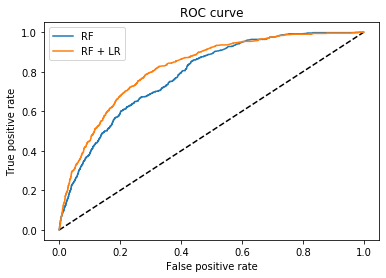

In [12]:
import matplotlib.pyplot as plt
# 將結果繪圖
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lr, tpr_rf_lr, label='RF + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [104]:
np.bincount(rfc_predict)

array([24352,   648])

In [13]:
# 將隨機森林+葉編碼+邏輯斯迴歸結果輸出
pred_rf_lr = lr.predict_proba(onehot.transform(rf.apply(val_x)))#[:, 1]
fpr_rf_lr, tpr_rf_lr, _ = roc_curve(val_y, pred_rf_lr[:, 1])

# 將隨機森林結果輸出
pred_rf = rf.predict_proba(val_x)#[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(val_y, pred_rf[:, 1])

auc_score = roc_auc_score(y_true=val_y.Y1, y_score=pred_rf_lr[:, 1])
acc = accuracy_score(y_true=val_y.Y1, y_pred=pred_rf_lr.argmax(axis=1))
print('Validation AUC: {:.3f}, Accuracy: {:.3f}'.format(auc_score, acc)) #0.967 / 0.9  #0.947 / 0.982

auc_score = roc_auc_score(y_true=val_y.Y1, y_score=pred_rf[:, 1])
acc = accuracy_score(y_true=val_y.Y1, y_pred=pred_rf.argmax(axis=1))
print('Validation AUC: {:.3f}, Accuracy: {:.3f}'.format(auc_score, acc))

crossv_lrRfc = cross_val_score(lr, onehot.transform(rf.apply(train_X_values)), train_Y, cv=10, scoring='roc_auc')
crossv_lrRfc
print(crossv_lrRfc.mean())

Validation AUC: 0.820, Accuracy: 0.980
Validation AUC: 0.783, Accuracy: 0.976


array([0.73104515, 0.69119388, 0.93983138, 0.94882679, 0.82956862,
       0.77666173, 0.7738773 , 0.78161607, 0.77683929, 0.80080816])

0.805026836734694


In [14]:
test_Y_pred = lr.predict_proba(onehot.transform(rf.apply(test_X)))
df_test['predict_proba'] = test_Y_pred[:, 1]
print(df_test.shape)
df_test

(150000, 132)


,CUS_ID,GENDER,AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,EDUCATION_CD,MARRIAGE_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,...,L1YR_GROSS_PRE_AMT,CUST_9_SEGMENTS_CD,FINANCETOOLS_A,FINANCETOOLS_B,FINANCETOOLS_C,FINANCETOOLS_D,FINANCETOOLS_E,FINANCETOOLS_F,FINANCETOOLS_G,predict_proba
0,1193,M,低,A1,A1,2.0,0.0,Y,4,Y,...,0.000151,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.177636
1,1727,M,低,A1,A1,NaN,0.0,N,0,N,...,0.000000,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001225
2,3293,M,低,A1,A1,1.0,0.0,N,0,N,...,0.000090,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004293
3,4328,M,低,A1,A1,NaN,0.0,N,0,N,...,0.000000,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002049
4,5555,M,低,A1,A1,1.0,0.0,Y,0,Y,...,0.000179,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.039805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2074085,F,中高,A1,A1,3.0,0.0,Y,0,N,...,0.000122,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549095
149996,2095927,F,高,B1,B1,3.0,1.0,Y,1,Y,...,0.000104,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.308385
149997,2125973,M,高,C1,C1,3.0,1.0,Y,0,N,...,0.000225,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.448057
149998,2511714,F,高,D,D,3.0,1.0,Y,0,N,...,0.000000,H,Y,N,N,N,N,N,N,0.098266


In [16]:
output = pd.concat((df_test[['CUS_ID']], df_test['predict_proba']), axis=1)
print(output.shape)

out = output.groupby('CUS_ID', as_index=False).mean()
out = out[['CUS_ID', 'predict_proba']]
out.columns = ['CUS_ID', 'Ypred']
out.to_csv('output_190929_18_manualLabel_RFC_RandomizedSearchCV.csv')
out

(150000, 2)


,CUS_ID,Ypred
0,3,0.019401
1,5,0.212825
2,20,0.019401
3,48,0.019401
4,49,0.212825
...,...,...
149995,2591999,0.020687
149996,2592019,0.011789
149997,2592023,0.044323
149998,2592034,0.028490


In [60]:
pd.read_csv('output_190922_2_xgboost_highCoffFeature.csv')

,Unnamed: 0,CUS_ID,Ypred
0,0,3,0.006966
1,1,5,0.089241
2,2,20,0.018169
3,3,48,0.006966
4,4,49,0.089241
...,...,...,...
149995,149995,2591999,0.009171
149996,149996,2592019,0.044108
149997,149997,2592023,0.016015
149998,149998,2592034,0.016411


In [17]:
pd.read_csv('output_190929_15_RFC_RandomizedSearchCV.csv')

,Unnamed: 0,CUS_ID,Ypred
0,0,3,0.198317
1,1,5,0.470073
2,2,20,0.284957
3,3,48,0.184642
4,4,49,0.474952
...,...,...,...
149995,149995,2591999,0.198833
149996,149996,2592019,0.282766
149997,149997,2592023,0.278741
149998,149998,2592034,0.263895
